Ausgangsbasis:

Modellierung der Ertragsdaten mit den Wetterdaten von den eigenen Wetterstationen und OpenWeather. Die KI soll die Zusammenhänge zwischen den Objekten und Umwelten in Bezug auf

Die Wetterdaten lernen.

Eigene Wetterstation ist besser für Niederschlag und hat Merkmale über Bodentemperatur und Bodenfeuchte.  OpenWeather hier hast du noch weitere Standorte, die wir zur Vorhersage von anderen Umwelten

Nehmen.

 

Kannst du aus den andern Wetterdaten von OpenWeather Ergebnisse vorhersagen für die Objekte aus dem Rizomaniaprogramm, obwohl sie dort nicht standen? Für Zuckerertrag (CSY) und Zuckergehalt (SC) zum Beispiel.
Hier habe ich Dir alle Wetterdaten von allen Standorten gegeben auch die Nematodenstandorte. Damit ihr mehr Daten habt, aber ich würde mich auch die Nicht Nematoden Standorte erstmal fokussieren.

 

Regionen: Kannst du Regionen finden anhand von den Wetterdaten. Hier wäre eine Möglichkeit zum Beispiel Genotypen, die in Herchsheim getestet wurden, jedoch nicht in Rittershausen, dort vorhersagen zu lassen und somit mehr Aussagen für die jeweiligen Objekte zu bekommen. Hier würde ich ebenfalls die Basis von OpenWeather nehmen.
 

Welches Merkmal hat von den Wetterdaten den höchsten Einfluss auf die Ertragsergebnisse?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import missingno as msno

In [2]:
# lat and lon for locations (according to google)
# Emmeloord
emlat = 52.7121
emlon = 5.7550
#Lelystad
lelat =52.5185
lelon = 5.4714
# Rittershausen
rilat = 50.8443
rilon = 8.2853
# Sommepy
solat =49.2506
solon =4.5571
#  Herchsheim
helat =49.6317
helon =9.9446
# Lamotte
lalat =43.4931
lalon =6.5360
# Mattenkofen
malat =48.7817
malon =12.7361
# Pithiviers
pilat =48.1734
pilon = 2.2558
#Oberviehhausen 
oblat = 48.7078
oblon = 12.8629
# Vierhoefen 
vilat= 53.2656
vilon= 10.2176
# Bautzen
balat= 51.1823
balon= 14.4238
# Stadthagen
stlat= 52.3231
stlon= 9.1926
# Goderville
golat= 49.6460
golon= 0.3675
# Soest
soelat= 51.5714
soelon= 8.1105
# Anklam
anlat= 53.8503
anlon= 13.6960
# Hamm
halat = 51.6739
halon = 7.8160


#### DATA

In [3]:
df_data = pd.read_csv('data/DatenfürGina_recorded2.csv', delimiter=';', decimal=',')


In [4]:
df_weatherstations = pd.read_csv('data/wetterdaten_all-stations_hourly.csv', delimiter=';', decimal=',')

In [5]:
df_data.describe()

,Betaine_NIR,CRY_NIR,CSY_NIR,DM_NIR,FieldBlock,FieldSubblock,Filler,Invert_NIR,LabNr,LayoutNr,...,Rep,SC_NIR,GinaSeednames!,SeriesId,TotalN_NIR,Trial,X,Y,Year,Anzahl
count,16573.000000,16544.000000,16478.000000,16573.000000,16632.000000,16632.000000,16632.000000,16573.00000,16632.000000,16632.000000,...,16632.0,16540.000000,16632.000000,16632.000000,16573.000000,16632.000000,16632.000000,16632.000000,16632.0,16632.000000
mean,0.188505,66.696972,11.486592,22.754977,2.042569,6.062771,0.000782,0.18216,33.876623,66.753247,...,1.0,17.225520,678.295515,1513.240260,0.147109,27773.255051,72.966811,11.654762,2021.0,89.914322
std,0.060407,8.666161,1.756680,1.904322,0.824212,3.462491,0.027947,0.07939,20.845029,13.774242,...,0.0,1.608526,375.610653,6.017891,0.026915,13557.898246,43.605042,7.156596,0.0,0.707847
min,-0.011300,26.730000,2.994134,15.931800,1.000000,1.000000,0.000000,0.00030,1.000000,18.000000,...,1.0,11.174400,1.000000,1501.000000,0.040200,10101.000000,2.000000,1.000000,2021.0,57.000000
25%,0.139600,61.000000,10.308943,21.631000,1.000000,3.000000,0.000000,0.11440,16.000000,72.000000,...,1.0,16.228875,349.000000,1509.000000,0.127100,10654.000000,43.000000,6.000000,2021.0,90.000000
50%,0.186400,67.000000,11.542320,22.714800,2.000000,6.000000,0.000000,0.17660,32.000000,72.000000,...,1.0,17.100900,694.000000,1513.000000,0.150600,30719.000000,67.000000,11.000000,2021.0,90.000000
75%,0.233400,72.870000,12.755940,23.954700,2.000000,9.000000,0.000000,0.24620,52.000000,72.000000,...,1.0,18.211025,1020.000000,1518.000000,0.167200,40201.000000,97.000000,17.000000,2021.0,90.000000
max,0.443200,96.130000,17.003961,29.025900,4.000000,12.000000,1.000000,0.46790,72.000000,72.000000,...,1.0,22.480300,1205.000000,1525.000000,0.252000,50553.000000,203.000000,30.000000,2021.0,90.000000


In [6]:
df_weatherstations.describe()

,Tag,Monat,Jahr,Lufttemperatur [°C]avg,Lufttemperatur [°C]max,Lufttemperatur [°C]min,Taupunkt [°C] avg,Taupunkt [°C] min,Solarstrahlung [W/m2],Sättigungsdampfdruckdefizit [kPa] avg,...,Bodentemperatur 5 [°C] min,Bodentemperatur 6 [°C] avg,Bodentemperatur 6 [°C] max,Bodentemperatur 6 [°C] min,Solarpanel [mV],Batterie [mV],DeltaT [°C] avg,DeltaT [°C] max,DeltaT [°C]min,ET0 [mm]
count,53683.000000,53683.000000,53683.0,50554.000000,50554.000000,50554.000000,50554.000000,50554.00000,53682.000000,50554.000000,...,45558.000000,45558.000000,45558.000000,45558.000000,53682.000000,53682.000000,50554.000000,50554.000000,50554.000000,2108.000000
mean,15.822402,6.937727,2021.0,14.975712,15.575152,14.396649,11.757776,11.18809,196.048098,0.344510,...,14.426459,14.252562,14.308914,14.214162,4846.207258,6637.498864,1.769039,2.140721,1.440361,2.858966
std,8.876526,1.730226,0.0,5.725620,5.815224,5.661539,5.285925,5.31094,268.710272,0.469299,...,3.372793,3.251912,3.248290,3.253111,4426.114156,135.605277,2.214843,2.446342,2.007821,1.357540
min,1.000000,3.000000,2021.0,-4.020000,-3.620000,-4.330000,-9.700000,-10.60000,0.000000,0.000000,...,4.800000,5.100000,5.200000,5.000000,0.000000,6217.000000,-1.000000,-1.000000,-1.000000,0.100000
25%,8.000000,5.000000,2021.0,11.170000,11.710000,10.610000,8.600000,8.10000,0.000000,0.000000,...,11.900000,11.700000,11.700000,11.600000,0.000000,6514.000000,0.000000,0.000000,0.000000,1.900000
50%,16.000000,7.000000,2021.0,15.010000,15.500000,14.530000,12.900000,12.30000,49.000000,0.150000,...,15.400000,15.300000,15.400000,15.300000,6005.000000,6590.000000,1.000000,1.000000,1.000000,2.700000
75%,24.000000,8.000000,2021.0,18.720000,19.460000,18.070000,15.700000,15.10000,331.000000,0.510000,...,16.900000,16.700000,16.700000,16.600000,9792.000000,6770.000000,3.000000,4.000000,2.000000,3.700000
max,31.000000,11.000000,2021.0,34.880000,35.330000,34.430000,25.400000,24.70000,1406.000000,3.900000,...,22.500000,21.400000,21.500000,21.400000,10511.000000,6881.000000,14.000000,14.000000,13.000000,8.300000


<AxesSubplot:>

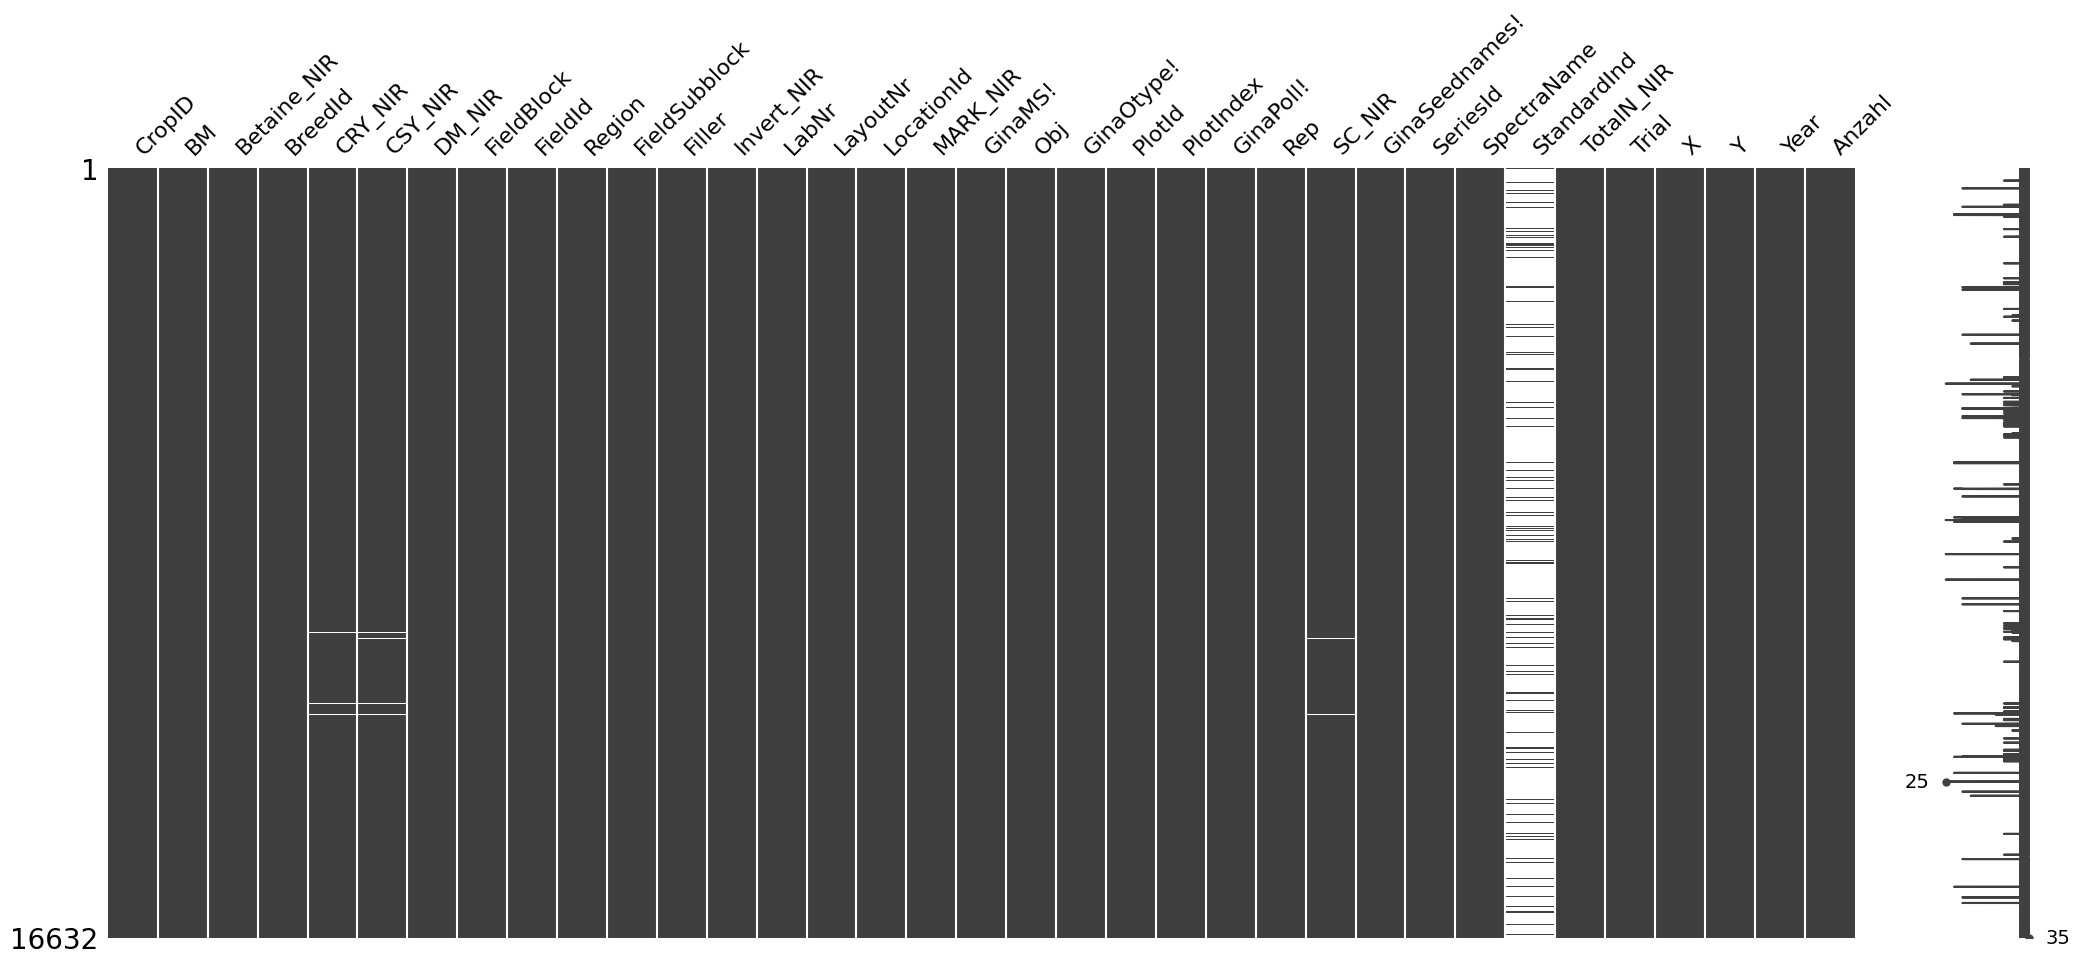

In [7]:
msno.matrix(df_data)

In [72]:
df_data.seednames_coded.nunique()

1205

<AxesSubplot:>

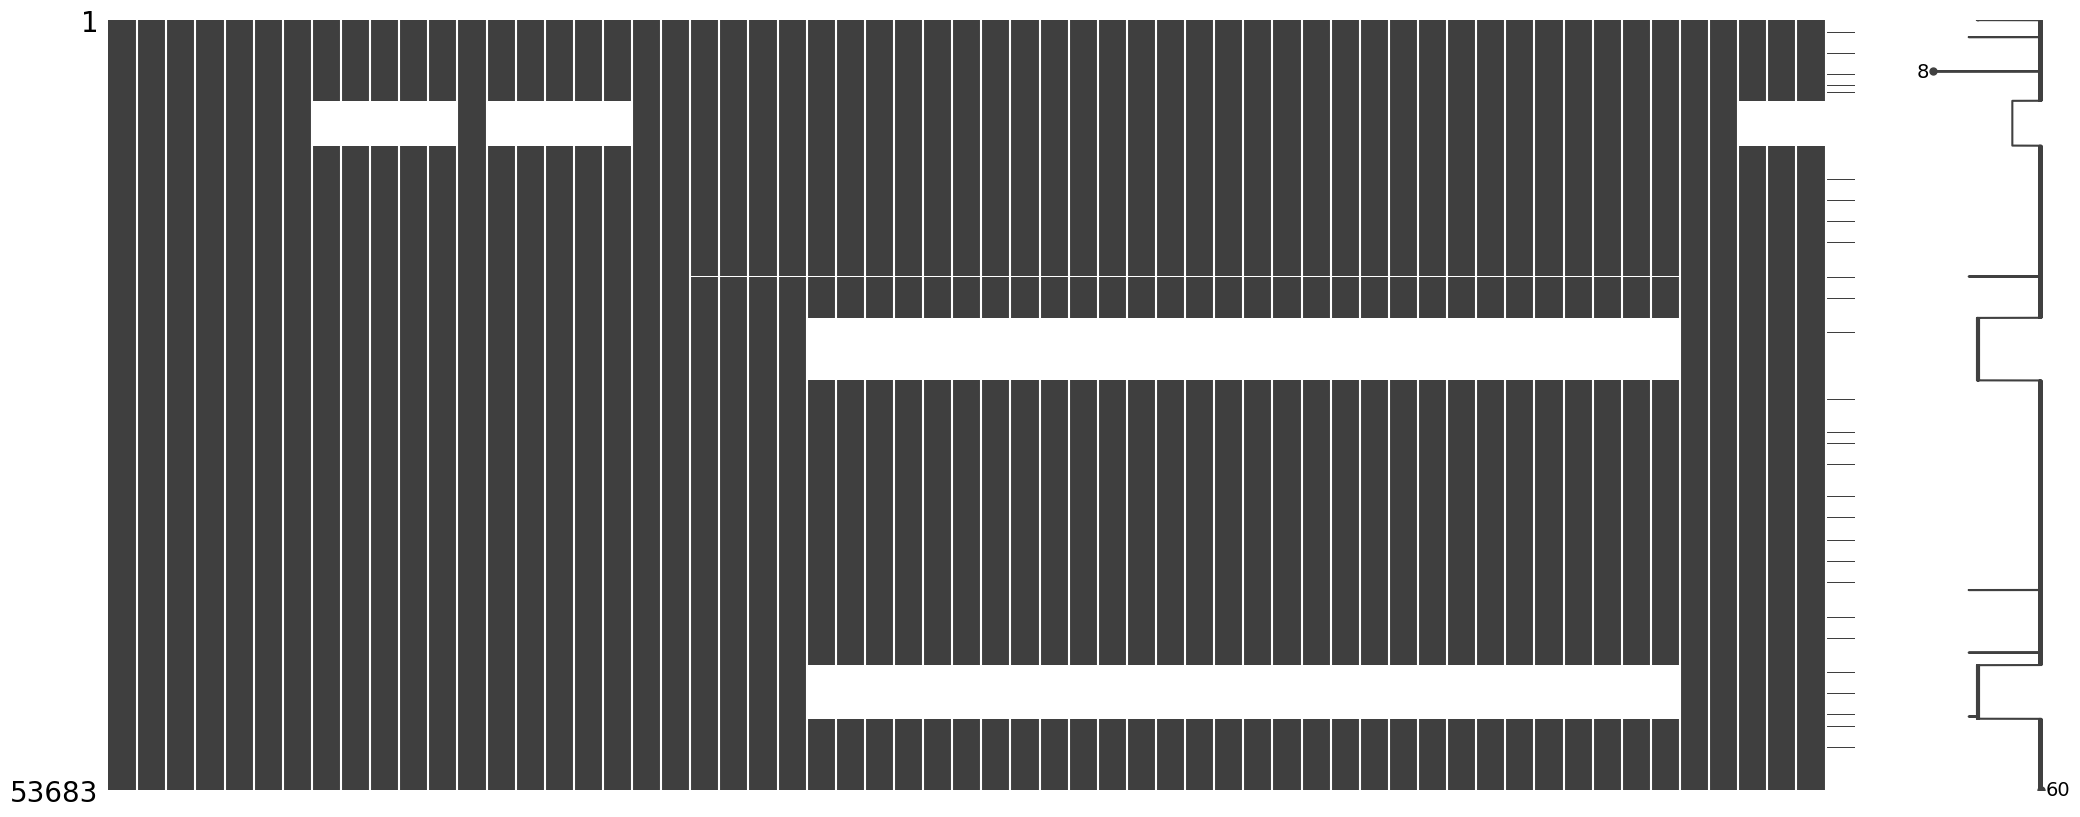

In [8]:
msno.matrix(df_weatherstations)

In [9]:
df_data.isnull().sum()

CropID                0
BM                    0
Betaine_NIR          59
BreedId               0
CRY_NIR              88
CSY_NIR             154
DM_NIR               59
FieldBlock            0
FieldId               0
Region                0
FieldSubblock         0
Filler                0
Invert_NIR           59
LabNr                 0
LayoutNr              0
LocationId            0
MARK_NIR             59
GinaMS!               0
Obj                   0
GinaOtype!            0
PlotId                0
PlotIndex             0
GinaPoll!             0
Rep                   0
SC_NIR               92
GinaSeednames!        0
SeriesId              0
SpectraName           7
StandardInd       14736
TotalN_NIR           59
Trial                 0
X                     0
Y                     0
Year                  0
Anzahl                0
dtype: int64

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16632 entries, 0 to 16631
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CropID          16632 non-null  object 
 1   BM              16632 non-null  object 
 2   Betaine_NIR     16573 non-null  float64
 3   BreedId         16632 non-null  object 
 4   CRY_NIR         16544 non-null  float64
 5   CSY_NIR         16478 non-null  float64
 6   DM_NIR          16573 non-null  float64
 7   FieldBlock      16632 non-null  int64  
 8   FieldId         16632 non-null  object 
 9   Region          16632 non-null  object 
 10  FieldSubblock   16632 non-null  int64  
 11  Filler          16632 non-null  int64  
 12  Invert_NIR      16573 non-null  float64
 13  LabNr           16632 non-null  int64  
 14  LayoutNr        16632 non-null  int64  
 15  LocationId      16632 non-null  object 
 16  MARK_NIR        16573 non-null  float64
 17  GinaMS!         16632 non-null 

In [11]:
df_data.nunique()

CropID                1
BM                    5
Betaine_NIR        2662
BreedId               1
CRY_NIR             871
CSY_NIR           16468
DM_NIR            14644
FieldBlock            4
FieldId              21
Region               10
FieldSubblock        12
Filler                2
Invert_NIR         3237
LabNr                72
LayoutNr              4
LocationId           19
MARK_NIR          11334
GinaMS!               7
Obj                  72
GinaOtype!            8
PlotId               72
PlotIndex         16632
GinaPoll!          1192
Rep                   1
SC_NIR            14270
GinaSeednames!     1205
SeriesId             24
SpectraName       16625
StandardInd           1
TotalN_NIR         1408
Trial               273
X                   199
Y                    30
Year                  1
Anzahl               23
dtype: int64

In [12]:
# drop all columns with useless information
df_data.drop(['CropID', 'BreedId', 'Filler', 'Rep', 'Year'], axis=1, inplace=True)
df_data.shape

(16632, 30)

In [13]:
df_data['BM'].unique

<bound method Series.unique of 0        B4
1        B4
2        B4
3        B4
4        B4
         ..
16627    B1
16628    B1
16629    B1
16630    B1
16631    B1
Name: BM, Length: 16632, dtype: object>

In [14]:
df_data['FieldBlock'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
16627    3
16628    3
16629    3
16630    3
16631    3
Name: FieldBlock, Length: 16632, dtype: int64>

In [15]:
df_data.columns = df_data.columns.str.lower()

In [16]:
df_data.columns

Index(['bm', 'betaine_nir', 'cry_nir', 'csy_nir', 'dm_nir', 'fieldblock',
       'fieldid', 'region', 'fieldsubblock', 'invert_nir', 'labnr', 'layoutnr',
       'locationid', 'mark_nir', 'ginams!', 'obj', 'ginaotype!', 'plotid',
       'plotindex', 'ginapoll!', 'sc_nir', 'ginaseednames!', 'seriesid',
       'spectraname', 'standardind', 'totaln_nir', 'trial', 'x', 'y',
       'anzahl'],
      dtype='object')

In [17]:
df_data.rename(columns={'ginams!': 'ms_comp', 'ginaotype!': 'otype_comp', 'ginapoll!': 'pollinator_comp', 'ginaseednames!': 'seednames_coded'}, inplace=True)
df_data.columns

Index(['bm', 'betaine_nir', 'cry_nir', 'csy_nir', 'dm_nir', 'fieldblock',
       'fieldid', 'region', 'fieldsubblock', 'invert_nir', 'labnr', 'layoutnr',
       'locationid', 'mark_nir', 'ms_comp', 'obj', 'otype_comp', 'plotid',
       'plotindex', 'pollinator_comp', 'sc_nir', 'seednames_coded', 'seriesid',
       'spectraname', 'standardind', 'totaln_nir', 'trial', 'x', 'y',
       'anzahl'],
      dtype='object')

In [18]:
df_data.mark_nir.unique()

array([5.3553, 5.2233, 5.3398, ..., 6.858 , 7.0797, 6.4874])

In [19]:
df_data.pollinator_comp.unique()

array([ 308, 1191,  313, ...,   83,   25,   15])

In [20]:
df_data.fieldid.unique()

array(['Emmeloord1', 'Lelystad1', 'Rittershausen1', 'Sommepy1',
       'Herchsheim1', 'Herchsheim_2', 'Lamotte1', 'Mattenkofen1',
       'Pithiviers1', 'Pithiviers2', 'Oberviehhausen1', 'Vierhoefen1',
       'Bautzen1', 'Stadthagen1', 'Stadthagen2', 'Goderville1', 'Soest1',
       'Anklam1', 'Anklam2', 'Hamm1', 'Lamotte2'], dtype=object)

In [21]:
df_data.locationid.unique()

array(['Emmeloord', 'Lelystad', 'Rittershausen', 'Sommepy', 'Herchsheim',
       'Herchsheim_2', 'Lamotte', 'Mattenkofen', 'Pithiviers',
       'FR_External', 'Oberviehhausen', 'Vierhoefen', 'Bautzen',
       'Stadthagen', 'Goderville', 'Soest', 'Anklam', 'DE_External',
       'Hamm'], dtype=object)

In [22]:
df_weatherstations.columns

Index(['Standort', 'Unnamed: 1', 'Datum/Uhrzeit', 'Tag', 'Monat', 'Jahr',
       'Uhrzeit', 'Lufttemperatur [°C]avg', 'Lufttemperatur [°C]max',
       'Lufttemperatur [°C]min', 'Taupunkt [°C] avg', 'Taupunkt [°C] min',
       'Solarstrahlung [W/m2]', 'Sättigungsdampfdruckdefizit [kPa] avg ',
       'Sättigungsdampfdruckdefizit [kPa] min',
       'Relative Luftfeuchtigkeit [%] avg',
       'Relative Luftfeuchtigkeit [%] max',
       'Relative Luftfeuchtigkeit [%] min', 'Niederschlag [mm]',
       'Blattnässe [min]', 'U-sonic wind speed [m/s] avg',
       'U-sonic wind speed [m/s] max', 'Windspitzen [m/s]',
       'U-sonic wind dir [deg]', 'EAG Bodenfeuchte 1 [%]',
       'EAG Bodenfeuchte 2 [%]', 'EAG Bodenfeuchte 3 [%]',
       'EAG Bodenfeuchte 4 [%]', 'EAG Bodenfeuchte 5 [%]',
       'EAG Bodenfeuchte 6 [%]', 'EAG Bodensalzgehalt 1 [VIC]',
       'EAG Bodensalzgehalt 2 [VIC]', 'EAG Bodensalzgehalt 3 [VIC]',
       'EAG Bodensalzgehalt 4 [VIC]', 'EAG Bodensalzgehalt 5 [VIC]',
       '

In [23]:
df_weatherstations.head()

,Standort,Unnamed: 1,Datum/Uhrzeit,Tag,Monat,Jahr,Uhrzeit,Lufttemperatur [°C]avg,Lufttemperatur [°C]max,Lufttemperatur [°C]min,...,Bodentemperatur 5 [°C] min,Bodentemperatur 6 [°C] avg,Bodentemperatur 6 [°C] max,Bodentemperatur 6 [°C] min,Solarpanel [mV],Batterie [mV],DeltaT [°C] avg,DeltaT [°C] max,DeltaT [°C]min,ET0 [mm]
0,Anklam,D,2021-04-14 17:00:00,14,4,2021,17:00,8.12,8.49,7.55,...,NaN,NaN,NaN,NaN,7069.0,6747.0,5.0,5.0,5.0,NaN
1,Anklam,D,2021-04-14 18:00:00,14,4,2021,18:00,7.76,8.17,7.32,...,NaN,NaN,NaN,NaN,6906.0,6639.0,5.0,5.0,4.0,NaN
2,Anklam,D,2021-04-14 19:00:00,14,4,2021,19:00,6.56,7.23,5.68,...,NaN,NaN,NaN,NaN,2545.0,6525.0,4.0,5.0,4.0,NaN
3,Anklam,D,2021-04-14 20:00:00,14,4,2021,20:00,4.02,5.34,2.69,...,NaN,NaN,NaN,NaN,0.0,6434.0,3.0,3.0,2.0,NaN
4,Anklam,D,2021-04-14 21:00:00,14,4,2021,21:00,2.82,3.34,2.17,...,NaN,NaN,NaN,NaN,0.0,6368.0,1.0,2.0,1.0,NaN


In [24]:
df_weatherstations.Standort.unique()

array(['Anklam', 'Bautzen', 'Berklingen', 'Emmeloord', 'Groningen',
       'Herchsheim 1', 'Lamotte', 'Lelystad', 'Mattenkofen', 'Peine',
       'Soest', 'Söllingen', 'Sommepy', 'Stadthagen'], dtype=object)

In [25]:
# change date to datetime
df_weatherstations['Datum/Uhrzeit'] = pd.to_datetime(df_weatherstations['Datum/Uhrzeit'], yearfirst=True, format="%Y-%m-%d %H:%M:%S")

In [26]:
type(df_weatherstations['Datum/Uhrzeit'])

pandas.core.series.Series

In [27]:
df_weatherstations['Unnamed: 1'].unique()

array(['D', 'NL', 'F'], dtype=object)

In [28]:
df_weatherstations.columns

Index(['Standort', 'Unnamed: 1', 'Datum/Uhrzeit', 'Tag', 'Monat', 'Jahr',
       'Uhrzeit', 'Lufttemperatur [°C]avg', 'Lufttemperatur [°C]max',
       'Lufttemperatur [°C]min', 'Taupunkt [°C] avg', 'Taupunkt [°C] min',
       'Solarstrahlung [W/m2]', 'Sättigungsdampfdruckdefizit [kPa] avg ',
       'Sättigungsdampfdruckdefizit [kPa] min',
       'Relative Luftfeuchtigkeit [%] avg',
       'Relative Luftfeuchtigkeit [%] max',
       'Relative Luftfeuchtigkeit [%] min', 'Niederschlag [mm]',
       'Blattnässe [min]', 'U-sonic wind speed [m/s] avg',
       'U-sonic wind speed [m/s] max', 'Windspitzen [m/s]',
       'U-sonic wind dir [deg]', 'EAG Bodenfeuchte 1 [%]',
       'EAG Bodenfeuchte 2 [%]', 'EAG Bodenfeuchte 3 [%]',
       'EAG Bodenfeuchte 4 [%]', 'EAG Bodenfeuchte 5 [%]',
       'EAG Bodenfeuchte 6 [%]', 'EAG Bodensalzgehalt 1 [VIC]',
       'EAG Bodensalzgehalt 2 [VIC]', 'EAG Bodensalzgehalt 3 [VIC]',
       'EAG Bodensalzgehalt 4 [VIC]', 'EAG Bodensalzgehalt 5 [VIC]',
       '

In [29]:
df_weatherstations.rename(columns={'Unnamed: 1': 'country', 'Datum/Uhrzeit': 'datetime'}, inplace=True)
df_weatherstations.columns = df_weatherstations.columns.str.lower()
df_weatherstations.columns = df_weatherstations.columns.str.replace(' ', '_')
df_weatherstations.columns

Index(['standort', 'country', 'datetime', 'tag', 'monat', 'jahr', 'uhrzeit',
       'lufttemperatur_[°c]avg', 'lufttemperatur_[°c]max',
       'lufttemperatur_[°c]min', 'taupunkt_[°c]_avg', 'taupunkt_[°c]_min',
       'solarstrahlung_[w/m2]', 'sättigungsdampfdruckdefizit_[kpa]_avg_',
       'sättigungsdampfdruckdefizit_[kpa]_min',
       'relative_luftfeuchtigkeit_[%]_avg',
       'relative_luftfeuchtigkeit_[%]_max',
       'relative_luftfeuchtigkeit_[%]_min', 'niederschlag_[mm]',
       'blattnässe_[min]', 'u-sonic_wind_speed_[m/s]_avg',
       'u-sonic_wind_speed_[m/s]_max', 'windspitzen_[m/s]',
       'u-sonic_wind_dir_[deg]', 'eag_bodenfeuchte_1_[%]',
       'eag_bodenfeuchte_2_[%]', 'eag_bodenfeuchte_3_[%]',
       'eag_bodenfeuchte_4_[%]', 'eag_bodenfeuchte_5_[%]',
       'eag_bodenfeuchte_6_[%]', 'eag_bodensalzgehalt_1_[vic]',
       'eag_bodensalzgehalt_2_[vic]', 'eag_bodensalzgehalt_3_[vic]',
       'eag_bodensalzgehalt_4_[vic]', 'eag_bodensalzgehalt_5_[vic]',
       'eag_bode

In [30]:
df_data.head()

,bm,betaine_nir,cry_nir,csy_nir,dm_nir,fieldblock,fieldid,region,fieldsubblock,invert_nir,...,sc_nir,seednames_coded,seriesid,spectraname,standardind,totaln_nir,trial,x,y,anzahl
0,B4,0.1551,54.60,8.838976,21.5439,1,Emmeloord1,Niederlande,1,0.1769,...,16.1886,85,1501,B4_2021_40101001_Emme.spc,NaN,0.1318,40101,2,1,90
1,B4,0.1502,51.07,8.493911,21.8552,1,Emmeloord1,Niederlande,2,0.1539,...,16.6319,1204,1501,B4_2021_40101007_Emme.spc,Y,0.1355,40101,2,2,90
2,B4,0.1370,52.73,8.356650,21.1878,1,Emmeloord1,Niederlande,3,0.1643,...,15.8480,90,1501,B4_2021_40101013_Emme.spc,NaN,0.1148,40101,2,3,90
3,B4,0.1391,44.33,6.957815,21.1140,1,Emmeloord1,Niederlande,4,0.1647,...,15.6955,1142,1501,B4_2021_40101019_Emme.spc,NaN,0.1349,40101,2,4,90
4,B4,0.1286,50.00,7.835800,20.8531,1,Emmeloord1,Niederlande,5,0.1615,...,15.6716,95,1501,B4_2021_40101025_Emme.spc,NaN,0.1185,40101,2,5,90


In [31]:
df_data.columns

Index(['bm', 'betaine_nir', 'cry_nir', 'csy_nir', 'dm_nir', 'fieldblock',
       'fieldid', 'region', 'fieldsubblock', 'invert_nir', 'labnr', 'layoutnr',
       'locationid', 'mark_nir', 'ms_comp', 'obj', 'otype_comp', 'plotid',
       'plotindex', 'pollinator_comp', 'sc_nir', 'seednames_coded', 'seriesid',
       'spectraname', 'standardind', 'totaln_nir', 'trial', 'x', 'y',
       'anzahl'],
      dtype='object')

<AxesSubplot:xlabel='csy_nir', ylabel='ms_comp'>

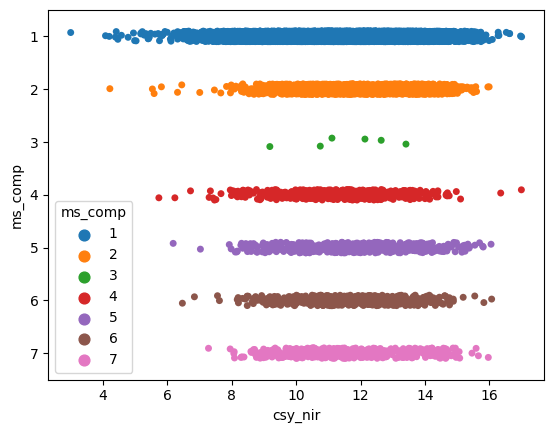

In [32]:
sns.stripplot(y='ms_comp', x='csy_nir', hue='ms_comp', orient='h', data=df_data)

<AxesSubplot:xlabel='csy_nir', ylabel='otype_comp'>

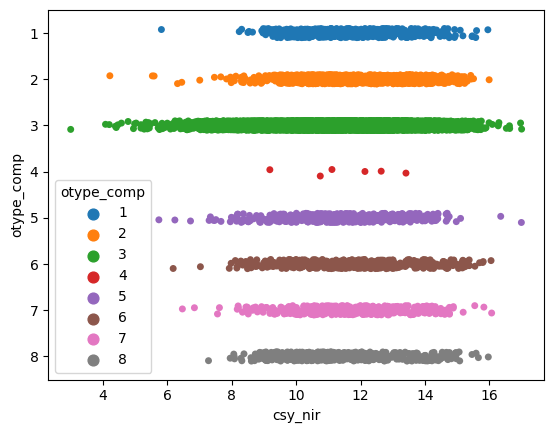

In [33]:
sns.stripplot(y='otype_comp', x='csy_nir', hue='otype_comp', orient='h', data=df_data)

<AxesSubplot:xlabel='anzahl', ylabel='otype_comp'>

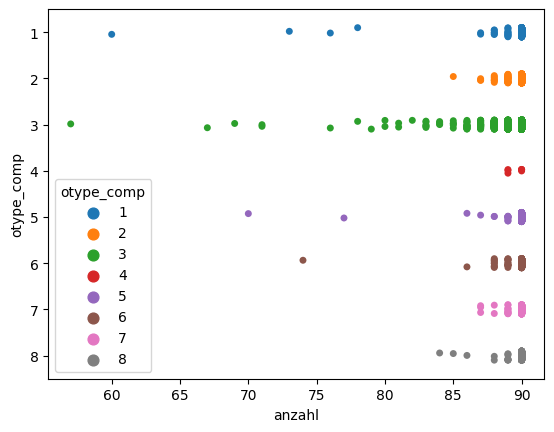

In [34]:
sns.stripplot(y='otype_comp', x='anzahl', hue='otype_comp', orient='h', data=df_data)

<AxesSubplot:xlabel='anzahl', ylabel='ms_comp'>

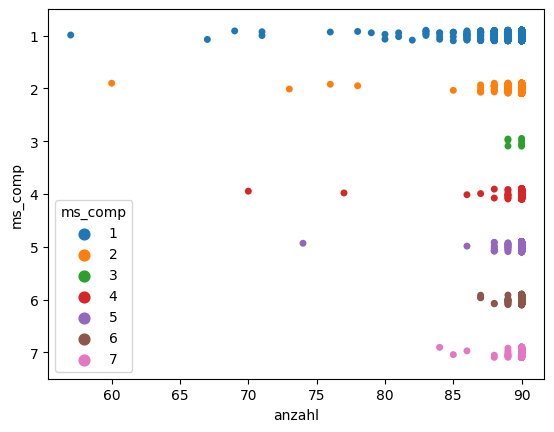

In [35]:
sns.stripplot(y='ms_comp', x='anzahl', hue='ms_comp', orient='h', data=df_data)

In [36]:
df_data.region.unique()

array(['Niederlande', 'Franken', 'Champagne', 'Picardie', 'Niederbayern',
       'Südfrankreich', 'Ostdeutschland', 'Nordrheinwestfalen',
       'Normandie', 'Norddeutschland'], dtype=object)

In [37]:
df_weatherstations.columns

Index(['standort', 'country', 'datetime', 'tag', 'monat', 'jahr', 'uhrzeit',
       'lufttemperatur_[°c]avg', 'lufttemperatur_[°c]max',
       'lufttemperatur_[°c]min', 'taupunkt_[°c]_avg', 'taupunkt_[°c]_min',
       'solarstrahlung_[w/m2]', 'sättigungsdampfdruckdefizit_[kpa]_avg_',
       'sättigungsdampfdruckdefizit_[kpa]_min',
       'relative_luftfeuchtigkeit_[%]_avg',
       'relative_luftfeuchtigkeit_[%]_max',
       'relative_luftfeuchtigkeit_[%]_min', 'niederschlag_[mm]',
       'blattnässe_[min]', 'u-sonic_wind_speed_[m/s]_avg',
       'u-sonic_wind_speed_[m/s]_max', 'windspitzen_[m/s]',
       'u-sonic_wind_dir_[deg]', 'eag_bodenfeuchte_1_[%]',
       'eag_bodenfeuchte_2_[%]', 'eag_bodenfeuchte_3_[%]',
       'eag_bodenfeuchte_4_[%]', 'eag_bodenfeuchte_5_[%]',
       'eag_bodenfeuchte_6_[%]', 'eag_bodensalzgehalt_1_[vic]',
       'eag_bodensalzgehalt_2_[vic]', 'eag_bodensalzgehalt_3_[vic]',
       'eag_bodensalzgehalt_4_[vic]', 'eag_bodensalzgehalt_5_[vic]',
       'eag_bode

In [38]:
collist = ['lufttemperatur_[°c]avg', 'lufttemperatur_[°c]max', 'lufttemperatur_[°c]min',
                                                               'solarstrahlung_[w/m2]', 'relative_luftfeuchtigkeit_[%]_avg', 
                                                               'relative_luftfeuchtigkeit_[%]_max', 'relative_luftfeuchtigkeit_[%]_min', 'niederschlag_[mm]', 
                                                               'blattnässe_[min]', 'eag_bodenfeuchte_1_[%]', 'eag_bodenfeuchte_2_[%]', 'eag_bodenfeuchte_3_[%]',
                                                               'eag_bodenfeuchte_4_[%]', 'eag_bodenfeuchte_5_[%]', 'eag_bodenfeuchte_6_[%]', 'eag_bodensalzgehalt_1_[vic]',
                                                               'eag_bodensalzgehalt_2_[vic]', 'eag_bodensalzgehalt_3_[vic]',
                                                               'eag_bodensalzgehalt_4_[vic]', 'eag_bodensalzgehalt_5_[vic]',
                                                               'eag_bodensalzgehalt_6_[vic]', 'bodentemperatur_1_[°c]_avg',
                                                               'bodentemperatur_1_[°c]_max', 'bodentemperatur_1_[°c]_min',
                                                               'bodentemperatur_2_[°c]_avg', 'bodentemperatur_2_[°c]_max',
                                                               'bodentemperatur_2_[°c]_min', 'bodentemperatur_3_[°c]_avg',
                                                               'bodentemperatur_3_[°c]_max', 'bodentemperatur_3_[°c]_min',
                                                               'bodentemperatur_4_[°c]_avg', 'bodentemperatur_4_[°c]_max',
                                                               'bodentemperatur_4_[°c]_min', 'bodentemperatur_5_[°c]_avg',
                                                               'bodentemperatur_5_[°c]_max', 'bodentemperatur_5_[°c]_min',
                                                               'bodentemperatur_6_[°c]_avg', 'bodentemperatur_6_[°c]_max',
                                                               'bodentemperatur_6_[°c]_min','deltat_[°c]_avg', 'deltat_[°c]_max', 'deltat_[°c]min', 'et0_[mm]']

In [39]:
# calculate the mean of avg, min, max of Temperatur (Luft & Boden), humidity (Luft & Boden), soil salinity and sunhine hours
df_weatherstations_daily = df_weatherstations.groupby(['tag'], as_index=False)[collist].mean()

In [40]:
df_weatherstations_daily.head()

,tag,lufttemperatur_[°c]avg,lufttemperatur_[°c]max,lufttemperatur_[°c]min,solarstrahlung_[w/m2],relative_luftfeuchtigkeit_[%]_avg,relative_luftfeuchtigkeit_[%]_max,relative_luftfeuchtigkeit_[%]_min,niederschlag_[mm],blattnässe_[min],...,bodentemperatur_5_[°c]_avg,bodentemperatur_5_[°c]_max,bodentemperatur_5_[°c]_min,bodentemperatur_6_[°c]_avg,bodentemperatur_6_[°c]_max,bodentemperatur_6_[°c]_min,deltat_[°c]_avg,deltat_[°c]_max,deltat_[°c]min,et0_[mm]
0,1,14.062515,14.630527,13.522431,188.157984,82.686635,85.422557,79.799892,0.084598,16.392978,...,14.125433,14.188282,14.082756,13.965113,14.018375,13.925566,1.877246,2.225749,1.559281,2.622857
1,2,14.199373,14.804253,13.608996,199.181356,82.664689,85.511171,79.726081,0.054463,14.141243,...,14.056640,14.117397,14.015936,13.868260,13.925498,13.831541,1.890681,2.249104,1.560932,2.690000
2,3,14.999702,15.656190,14.365988,211.989865,80.297565,83.390381,77.043595,0.072410,13.164414,...,14.075778,14.136069,14.036201,13.881006,13.940437,13.843812,2.190476,2.600595,1.818452,2.975714
3,4,15.224280,15.829869,14.647982,183.016892,82.924452,85.937542,79.813595,0.119707,16.067005,...,14.204897,14.264262,14.164461,13.963269,14.020913,13.924156,1.849405,2.214286,1.491667,3.152857
4,5,14.280789,14.873402,13.695244,179.800113,87.109290,89.811541,84.209940,0.141554,20.126689,...,14.299735,14.360582,14.258862,14.067659,14.127712,14.027050,1.328718,1.658037,1.021072,2.878571


In [41]:
df_weatherstations.head()

,standort,country,datetime,tag,monat,jahr,uhrzeit,lufttemperatur_[°c]avg,lufttemperatur_[°c]max,lufttemperatur_[°c]min,...,bodentemperatur_5_[°c]_min,bodentemperatur_6_[°c]_avg,bodentemperatur_6_[°c]_max,bodentemperatur_6_[°c]_min,solarpanel_[mv],batterie_[mv],deltat_[°c]_avg,deltat_[°c]_max,deltat_[°c]min,et0_[mm]
0,Anklam,D,2021-04-14 17:00:00,14,4,2021,17:00,8.12,8.49,7.55,...,NaN,NaN,NaN,NaN,7069.0,6747.0,5.0,5.0,5.0,NaN
1,Anklam,D,2021-04-14 18:00:00,14,4,2021,18:00,7.76,8.17,7.32,...,NaN,NaN,NaN,NaN,6906.0,6639.0,5.0,5.0,4.0,NaN
2,Anklam,D,2021-04-14 19:00:00,14,4,2021,19:00,6.56,7.23,5.68,...,NaN,NaN,NaN,NaN,2545.0,6525.0,4.0,5.0,4.0,NaN
3,Anklam,D,2021-04-14 20:00:00,14,4,2021,20:00,4.02,5.34,2.69,...,NaN,NaN,NaN,NaN,0.0,6434.0,3.0,3.0,2.0,NaN
4,Anklam,D,2021-04-14 21:00:00,14,4,2021,21:00,2.82,3.34,2.17,...,NaN,NaN,NaN,NaN,0.0,6368.0,1.0,2.0,1.0,NaN


In [42]:
df_weatherstations.standort.unique()

array(['Anklam', 'Bautzen', 'Berklingen', 'Emmeloord', 'Groningen',
       'Herchsheim 1', 'Lamotte', 'Lelystad', 'Mattenkofen', 'Peine',
       'Soest', 'Söllingen', 'Sommepy', 'Stadthagen'], dtype=object)

In [43]:
#merge with original dataframe getting rid of extra columns
df_weatherstations_daily = (df_weatherstations.merge(df_weatherstations_daily, on=['tag'], suffixes=('', '_mean'))
                            .drop(collist, axis=1)
                            #.groupby(['tag'])
                            #.first()
                            #.reset_index())
                            )

In [44]:
df_weatherstations_daily.standort.unique()

array(['Anklam', 'Bautzen', 'Berklingen', 'Emmeloord', 'Groningen',
       'Herchsheim 1', 'Lamotte', 'Lelystad', 'Mattenkofen', 'Peine',
       'Soest', 'Söllingen', 'Sommepy', 'Stadthagen'], dtype=object)

In [45]:
df_weatherstations_daily.tag.unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 31])

In [46]:
df_weatherstations_daily.head()

,standort,country,datetime,tag,monat,jahr,uhrzeit,taupunkt_[°c]_avg,taupunkt_[°c]_min,sättigungsdampfdruckdefizit_[kpa]_avg_,...,bodentemperatur_5_[°c]_avg_mean,bodentemperatur_5_[°c]_max_mean,bodentemperatur_5_[°c]_min_mean,bodentemperatur_6_[°c]_avg_mean,bodentemperatur_6_[°c]_max_mean,bodentemperatur_6_[°c]_min_mean,deltat_[°c]_avg_mean,deltat_[°c]_max_mean,deltat_[°c]min_mean,et0_[mm]_mean
0,Anklam,D,2021-04-14 17:00:00,14,4,2021,17:00,-3.8,-4.7,0.61,...,15.081073,15.141455,15.042373,14.803178,14.859251,14.764689,1.840352,2.19296,1.511628,2.843939
1,Anklam,D,2021-04-14 18:00:00,14,4,2021,18:00,-3.8,-4.7,0.59,...,15.081073,15.141455,15.042373,14.803178,14.859251,14.764689,1.840352,2.19296,1.511628,2.843939
2,Anklam,D,2021-04-14 19:00:00,14,4,2021,19:00,-2.8,-3.8,0.47,...,15.081073,15.141455,15.042373,14.803178,14.859251,14.764689,1.840352,2.19296,1.511628,2.843939
3,Anklam,D,2021-04-14 20:00:00,14,4,2021,20:00,-1.9,-2.7,0.28,...,15.081073,15.141455,15.042373,14.803178,14.859251,14.764689,1.840352,2.19296,1.511628,2.843939
4,Anklam,D,2021-04-14 21:00:00,14,4,2021,21:00,-0.3,-1.3,0.15,...,15.081073,15.141455,15.042373,14.803178,14.859251,14.764689,1.840352,2.19296,1.511628,2.843939


In [47]:
df_weatherstations_daily.shape

(53683, 60)

In [48]:
df_weatherstations_daily.to_pickle('data/df_weatherstations_daily.pkl')

In [49]:
df_weatherstations_daily.groupby(['monat', 'tag', 'standort']).mean()


/var/folders/r8/96vp6rrx3633scm80v59y52c0000gn/T/ipykernel_1488/360746422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weatherstations_daily.groupby(['monat', 'tag', 'standort']).mean()


jahr  taupunkt_[°c]_avg  taupunkt_[°c]_min  \
monat tag standort                                                    
3     30  Mattenkofen  2021.0           0.188889          -0.544444   
      31  Mattenkofen  2021.0           2.300000           1.637500   
4     1   Berklingen   2021.0           2.520000           1.600000   
          Mattenkofen  2021.0           3.375000           2.716667   
      2   Berklingen   2021.0           1.312500           0.962500   
...                       ...                ...                ...   
11    8   Stadthagen   2021.0           7.866667           7.604167   
      9   Stadthagen   2021.0           7.116667           6.479167   
      10  Stadthagen   2021.0           2.787500           2.216667   
      11  Stadthagen   2021.0           7.158333           6.895833   
      12  Stadthagen   2021.0           7.057143           6.628571   

                       sättigungsdampfdruckdefizit_[kpa]_avg_  \
monat tag standort                                              
3     30  Mattenkofen                                1.248889   
      31  Mattenkofen                                0.818750   
4     1   Berklingen                                 0.332000   
          Mattenkofen                                0.786667   
      2   Berklingen                                 0.252500   
...                                                       ...   
11    8   Stadthagen                                 0.000000   
      9   Stadthagen                                 0.069583   
      10  Stadthagen                                 0.010000   
      11  Stadthagen                                 0.000000   
      12  Stadthagen                                 0.007143   

                       sättigungsdampfdruckdefizit_[kpa]_min  \
monat tag standort                                             
3     30  Mattenkofen                               1.142222   
      31  Mattenkofen                               0.723333   
4     1   Berklingen                                0.272000   
          Mattenkofen                               0.676250   
      2   Berklingen                                0.228333   
...                                                      ...   
11    8   Stadthagen                                0.000000   
      9   Stadthagen                                0.052083   
      10  Stadthagen                                0.004583   
      11  Stadthagen                                0.000000   
      12  Stadthagen                                0.005000   

                       u-sonic_wind_speed_[m/s]_avg  \
monat tag standort                                    
3     30  Mattenkofen                      0.933333   
      31  Mattenkofen                      1.016667   
4     1   Berklingen                       3.980000   
          Mattenkofen                      1.579167   
      2   Berklingen                       3.762500   
...                                             ...   
11    8   Stadthagen                       2.895833   
      9   Stadthagen                       1.595833   
      10  Stadthagen                       2.108333   
      11  Stadthagen                       2.225000   
      12  Stadthagen                       1.707143   

                       u-sonic_wind_speed_[m/s]_max  windspitzen_[m/s]  \
monat tag standort                                                       
3     30  Mattenkofen                      1.777778           2.500000   
      31  Mattenkofen                      1.737500           2.883333   
4     1   Berklingen                       5.640000           7.440000   
          Mattenkofen                      2.404167           3.779167   
      2   Berklingen                       4.541667           6.775000   
...                                             ...                ...   
11    8   Stadthagen                       3.379167           5.062500   
      9   Stadthagen                    

In [50]:
df_weatherstations_yearly = df_weatherstations_daily.groupby('standort', as_index=False).mean()

/var/folders/r8/96vp6rrx3633scm80v59y52c0000gn/T/ipykernel_1488/2940331773.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weatherstations_yearly = df_weatherstations_daily.groupby('standort', as_index=False).mean()


In [51]:
df_weatherstations_daily.standort.unique()

array(['Anklam', 'Bautzen', 'Berklingen', 'Emmeloord', 'Groningen',
       'Herchsheim 1', 'Lamotte', 'Lelystad', 'Mattenkofen', 'Peine',
       'Soest', 'Söllingen', 'Sommepy', 'Stadthagen'], dtype=object)

In [52]:
df_weatherstations_yearly.head()

,standort,tag,monat,jahr,taupunkt_[°c]_avg,taupunkt_[°c]_min,sättigungsdampfdruckdefizit_[kpa]_avg_,sättigungsdampfdruckdefizit_[kpa]_min,u-sonic_wind_speed_[m/s]_avg,u-sonic_wind_speed_[m/s]_max,...,bodentemperatur_5_[°c]_avg_mean,bodentemperatur_5_[°c]_max_mean,bodentemperatur_5_[°c]_min_mean,bodentemperatur_6_[°c]_avg_mean,bodentemperatur_6_[°c]_max_mean,bodentemperatur_6_[°c]_min_mean,deltat_[°c]_avg_mean,deltat_[°c]_max_mean,deltat_[°c]min_mean,et0_[mm]_mean
0,Anklam,16.137537,7.167795,2021.0,11.936635,11.395005,0.268423,0.216614,1.834470,2.316261,...,14.485558,14.545537,14.444841,14.270432,14.326692,14.232041,1.766576,2.138238,1.437968,2.858917
1,Bautzen,15.339609,7.170424,2021.0,7.927063,7.242354,0.382992,0.311551,1.470746,1.886797,...,14.463174,14.523149,14.422454,14.246819,14.303266,14.208427,1.768293,2.139624,1.439632,2.859913
2,Berklingen,15.844347,6.030857,2021.0,10.288968,9.713654,0.411136,0.340011,1.855762,2.485090,...,14.478588,14.538564,14.437869,14.262503,14.318875,14.224125,1.769179,2.140890,1.440443,2.861163
3,Emmeloord,15.880945,6.486389,2021.0,12.409243,11.917589,0.310826,0.257975,1.840802,2.353634,...,14.440069,14.500127,14.399298,14.229693,14.286030,14.191268,1.767615,2.138949,1.439262,2.850214
4,Groningen,18.040174,4.803474,2021.0,6.743974,6.218567,0.208806,0.168154,3.118350,3.867318,...,14.406008,14.466057,14.365143,14.201975,14.257882,14.163469,1.762265,2.133228,1.436684,2.839847


In [53]:
df_weatherstations_yearly.columns

Index(['standort', 'tag', 'monat', 'jahr', 'taupunkt_[°c]_avg',
       'taupunkt_[°c]_min', 'sättigungsdampfdruckdefizit_[kpa]_avg_',
       'sättigungsdampfdruckdefizit_[kpa]_min', 'u-sonic_wind_speed_[m/s]_avg',
       'u-sonic_wind_speed_[m/s]_max', 'windspitzen_[m/s]',
       'u-sonic_wind_dir_[deg]', 'solarpanel_[mv]', 'batterie_[mv]',
       'lufttemperatur_[°c]avg_mean', 'lufttemperatur_[°c]max_mean',
       'lufttemperatur_[°c]min_mean', 'solarstrahlung_[w/m2]_mean',
       'relative_luftfeuchtigkeit_[%]_avg_mean',
       'relative_luftfeuchtigkeit_[%]_max_mean',
       'relative_luftfeuchtigkeit_[%]_min_mean', 'niederschlag_[mm]_mean',
       'blattnässe_[min]_mean', 'eag_bodenfeuchte_1_[%]_mean',
       'eag_bodenfeuchte_2_[%]_mean', 'eag_bodenfeuchte_3_[%]_mean',
       'eag_bodenfeuchte_4_[%]_mean', 'eag_bodenfeuchte_5_[%]_mean',
       'eag_bodenfeuchte_6_[%]_mean', 'eag_bodensalzgehalt_1_[vic]_mean',
       'eag_bodensalzgehalt_2_[vic]_mean', 'eag_bodensalzgehalt_3_[vic]_

<AxesSubplot:xlabel='lufttemperatur_[°c]avg_mean', ylabel='standort'>

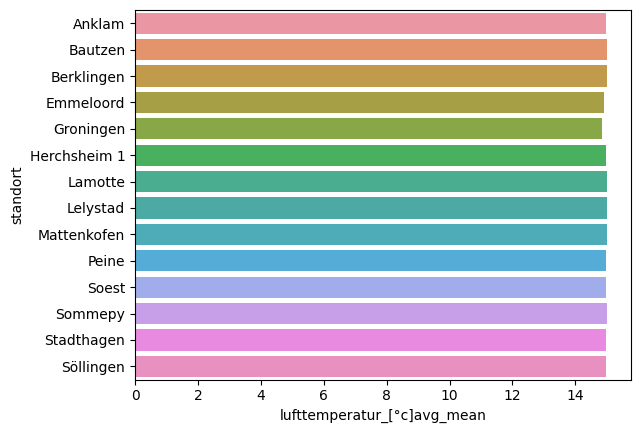

In [54]:
sns.barplot(data=df_weatherstations_yearly, x='lufttemperatur_[°c]avg_mean', y='standort')

<AxesSubplot:xlabel='lufttemperatur_[°c]avg_mean', ylabel='standort'>

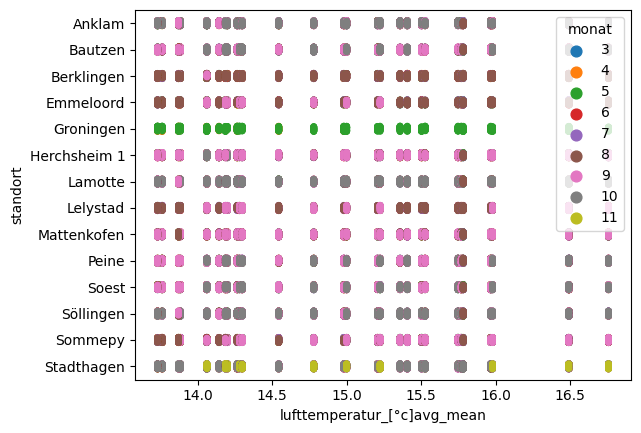

In [55]:
sns.stripplot(data=df_weatherstations_daily, x='lufttemperatur_[°c]avg_mean', y='standort', hue='monat')

In [56]:
beetloc = df_data.locationid.unique().tolist()

In [57]:
beetloc

['Emmeloord',
 'Lelystad',
 'Rittershausen',
 'Sommepy',
 'Herchsheim',
 'Herchsheim_2',
 'Lamotte',
 'Mattenkofen',
 'Pithiviers',
 'FR_External',
 'Oberviehhausen',
 'Vierhoefen',
 'Bautzen',
 'Stadthagen',
 'Goderville',
 'Soest',
 'Anklam',
 'DE_External',
 'Hamm']

In [58]:
weatherloc = df_weatherstations.standort.unique().tolist()

In [59]:
print(f'these {len(beetloc)} locations are listed in beetdata: \n {beetloc}')
print(f'these {len(weatherloc)} locations are listed in weatherdata: \n {weatherloc}')
print(f'these locations overlap in weather and beetdata:')
for loc in beetloc:
    for pl in weatherloc:
        if loc == pl:
            print(loc)


these 19 locations are listed in beetdata: 
 ['Emmeloord', 'Lelystad', 'Rittershausen', 'Sommepy', 'Herchsheim', 'Herchsheim_2', 'Lamotte', 'Mattenkofen', 'Pithiviers', 'FR_External', 'Oberviehhausen', 'Vierhoefen', 'Bautzen', 'Stadthagen', 'Goderville', 'Soest', 'Anklam', 'DE_External', 'Hamm']
these 14 locations are listed in weatherdata: 
 ['Anklam', 'Bautzen', 'Berklingen', 'Emmeloord', 'Groningen', 'Herchsheim 1', 'Lamotte', 'Lelystad', 'Mattenkofen', 'Peine', 'Soest', 'Söllingen', 'Sommepy', 'Stadthagen']
these locations overlap in weather and beetdata:
Emmeloord
Lelystad
Sommepy
Lamotte
Mattenkofen
Bautzen
Stadthagen
Soest
Anklam


In [60]:
# change standort and locationid column to location to be able to merge on it
df_weatherstations.rename(columns={'standort': 'location'}, inplace=True)
df_data.rename(columns={'locationid': 'location'}, inplace=True)
df_weatherstations_daily.rename(columns={'standort': 'location'}, inplace=True)


##### Location plotting

In [61]:
import plotly.express as px

In [62]:
df_locations = pd.read_csv('data/fieldid_gps_dates.csv')

In [63]:
df_locations.head()

,fieldid,latitude,longitude,sowing_year,sowing_month,sowing_day,harvesting_year,harvesting_month,havesting_day
0,Herchsheim,49.638659°,9.926104°,2021,4,11,2021,10,13
1,Herchsheim_2,49.636416°,9.942339°,2021,4,9,2021,9,26
2,Vierhöfen,48.776446°,12.737804°,2021,3,31,2021,10,11
3,Söllingen,52.109175°,10.926463°,2021,4,24,2021,11,1
4,Berklingen,52.102719°,10.732768°,2021,4,1,2021,9,11


In [64]:
df_locations['latitude'] = df_locations['latitude'].replace(r'°', r'', regex=True)
df_locations['longitude'] = df_locations['longitude'].replace(r'°', r'', regex=True)

In [65]:
df_locations['latitude'] = df_locations['latitude'].astype(str)
df_locations['longitude'] = df_locations['longitude'].astype(str)

In [66]:
df_locations['latitude'] = df_locations['latitude'].astype(float)
df_locations['longitude'] = df_locations['longitude'].astype(float)

In [67]:
df_locations.latitude

0     49.638659
1     49.636416
2     48.776446
3     52.109175
4     52.102719
5     52.260091
6     52.698061
7     52.552513
8     49.603966
9     49.251002
10    49.879380
11    48.776446
12    48.169585
13    48.702083
14    51.201418
15    49.645645
16    51.599977
17    53.939204
18    51.609609
Name: latitude, dtype: float64

In [68]:
df_locations.head()

,fieldid,latitude,longitude,sowing_year,sowing_month,sowing_day,harvesting_year,harvesting_month,havesting_day
0,Herchsheim,49.638659,9.926104,2021,4,11,2021,10,13
1,Herchsheim_2,49.636416,9.942339,2021,4,9,2021,9,26
2,Vierhöfen,48.776446,12.737804,2021,3,31,2021,10,11
3,Söllingen,52.109175,10.926463,2021,4,24,2021,11,1
4,Berklingen,52.102719,10.732768,2021,4,1,2021,9,11


In [69]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fieldid           19 non-null     object 
 1   latitude          19 non-null     float64
 2   longitude         19 non-null     float64
 3   sowing_year       19 non-null     int64  
 4   sowing_month      19 non-null     int64  
 5   sowing_day        19 non-null     int64  
 6   harvesting_year   19 non-null     int64  
 7   harvesting_month  19 non-null     int64  
 8   havesting_day     19 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.5+ KB


In [70]:
# use plotly mapbox to map the houses within her price range & preferred area

fig = px.scatter_mapbox(df_locations, lat='latitude', lon='longitude', color='fieldid', title='Fieldlocations', color_continuous_scale=px.colors.sequential.Bluered, hover_name='fieldid')
fig.update_layout( mapbox_style='open-street-map', title_x=0.5, legend_title_text='fieldid')
#fig.update_mapboxes(zoom=10.5, center_lat=47.6062, center_lon=-122.3321)
fig.show()


In [75]:
df_weatherstations.columns

Index(['location', 'country', 'datetime', 'tag', 'monat', 'jahr', 'uhrzeit',
       'lufttemperatur_[°c]avg', 'lufttemperatur_[°c]max',
       'lufttemperatur_[°c]min', 'taupunkt_[°c]_avg', 'taupunkt_[°c]_min',
       'solarstrahlung_[w/m2]', 'sättigungsdampfdruckdefizit_[kpa]_avg_',
       'sättigungsdampfdruckdefizit_[kpa]_min',
       'relative_luftfeuchtigkeit_[%]_avg',
       'relative_luftfeuchtigkeit_[%]_max',
       'relative_luftfeuchtigkeit_[%]_min', 'niederschlag_[mm]',
       'blattnässe_[min]', 'u-sonic_wind_speed_[m/s]_avg',
       'u-sonic_wind_speed_[m/s]_max', 'windspitzen_[m/s]',
       'u-sonic_wind_dir_[deg]', 'eag_bodenfeuchte_1_[%]',
       'eag_bodenfeuchte_2_[%]', 'eag_bodenfeuchte_3_[%]',
       'eag_bodenfeuchte_4_[%]', 'eag_bodenfeuchte_5_[%]',
       'eag_bodenfeuchte_6_[%]', 'eag_bodensalzgehalt_1_[vic]',
       'eag_bodensalzgehalt_2_[vic]', 'eag_bodensalzgehalt_3_[vic]',
       'eag_bodensalzgehalt_4_[vic]', 'eag_bodensalzgehalt_5_[vic]',
       'eag_bode

/var/folders/r8/96vp6rrx3633scm80v59y52c0000gn/T/ipykernel_1488/3571566964.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(18718.0, 0, 'm'),
 Text(18748.0, 0, 'o'),
 Text(18779.0, 0, 'n'),
 Text(18809.0, 0, 't'),
 Text(18840.0, 0, 'h'),
 Text(18871.0, 0, ''),
 Text(18901.0, 0, ''),
 Text(18932.0, 0, '')]

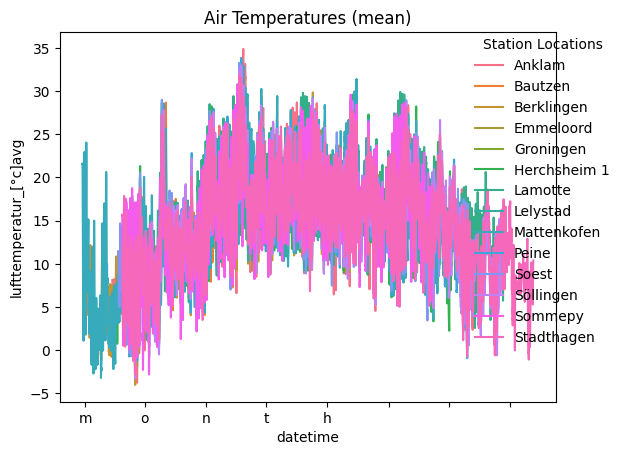

In [83]:
#plotting for presentation
fig = sns.lineplot(data=df_weatherstations, x = 'datetime', y = 'lufttemperatur_[°c]avg', hue = 'location');
fig.legend(title='Station Locations', loc='upper right', borderaxespad=0, frameon=False, bbox_to_anchor=(1.12, 1));
fig.set_title('Air Temperatures (mean)')
#month_starts = [1,32,61,92,122,153,183,214]
month_names = ['Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov'] 

#fig.set_xticks(month_starts)
fig.set_xticklabels('month')
#plt.savefig('plots/temp_avg_locations_day.png', dpi= 300) # for high resolution